In [1]:
print('R.Sanjana')
print('212223240148')

R.Sanjana
212223240148


In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image= X_train[19000]


In [7]:
single_image.shape

(28, 28)

R.Sanjana


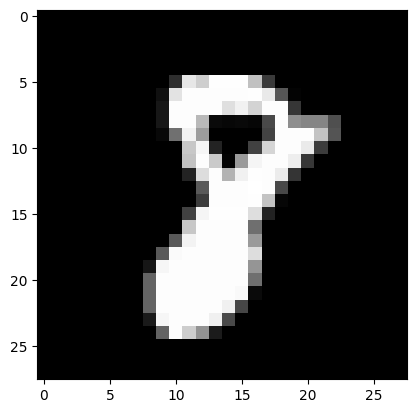

In [8]:
print('R.Sanjana')
plt.imshow(single_image,cmap='gray')

In [9]:

y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:

y_train_onehot.shape

(60000, 10)

R.Sanjana


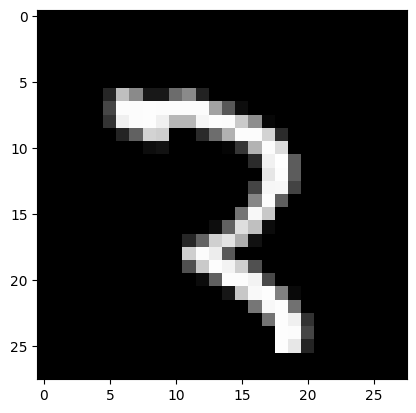

In [19]:
single_image = X_train[500]
print('R.Sanjana')
plt.imshow(single_image,cmap='gray')


In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [22]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D (pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [23]:
print('R.Sanjana')
model.summary()

R.Sanjana
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
______

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [25]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.2370 - accuracy: 0.9320 - val_loss: 0.0930 - val_accuracy: 0.9726
Epoch 2/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0825 - accuracy: 0.9754 - val_loss: 0.0659 - val_accuracy: 0.9790
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0558 - val_accuracy: 0.9829
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0526 - val_accuracy: 0.9831
Epoch 5/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0649 - val_accuracy: 0.9807


In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
print('R.Sanjana')
metrics.head()

R.Sanjana


,loss,accuracy,val_loss,val_accuracy
0,0.237035,0.932000,0.093025,0.9726
1,0.082539,0.975350,0.065869,0.9790
2,0.057985,0.982500,0.055809,0.9829
3,0.045218,0.986200,0.052622,0.9831
4,0.036953,0.988817,0.064911,0.9807


R.Sanjana


<Axes: >

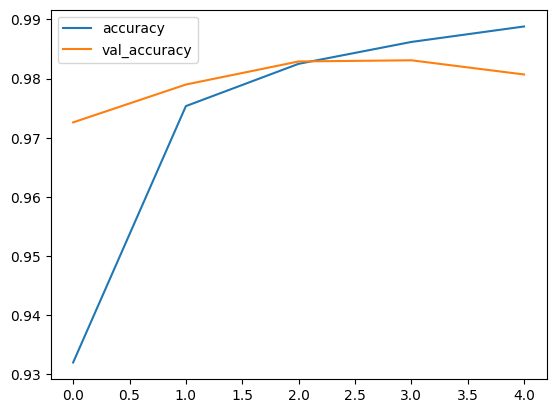

In [28]:
print("R.Sanjana")
metrics[['accuracy','val_accuracy']].plot()

R.Sanjana


<Axes: >

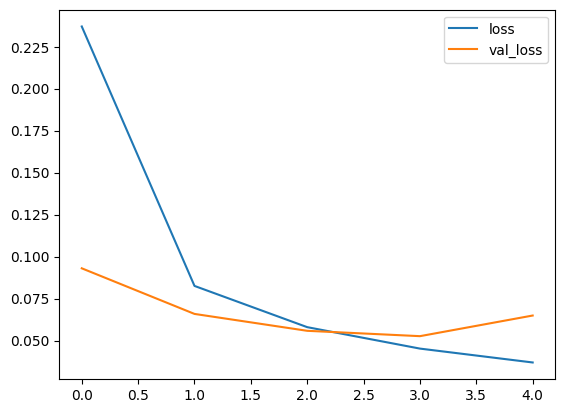

In [29]:
print('R.Sanjana')
metrics[['loss','val_loss']].plot()

In [30]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 7ms/step


In [31]:
print("R.Sanjana")
print(confusion_matrix(y_test,x_test_predictions))

R.Sanjana
[[ 977    0    0    1    0    0    0    1    1    0]
 [   0 1130    3    0    0    0    0    2    0    0]
 [   4    2 1006    0    1    0    0   17    1    1]
 [   1    0    3  990    0    5    0   10    1    0]
 [   1    0    0    0  978    0    0    0    0    3]
 [   2    0    0    7    0  876    4    0    2    1]
 [   9    3    0    0    5    1  937    0    3    0]
 [   0    2    3    0    0    0    0 1022    1    0]
 [   7    0    5    0    2    1    2    7  948    2]
 [   4    5    0    4   14    3    0   30    6  943]]


In [32]:
print("R.Sanjana")
print(classification_report(y_test,x_test_predictions))

R.Sanjana
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.94      0.99      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.93      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [33]:
img = image.load_img('seven.png')

In [34]:
type(img)

PIL.Image.Image

In [35]:
img = image.load_img('seven.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [36]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 20ms/step


In [37]:
print(x_single_prediction)

[7]


R.Sanjana


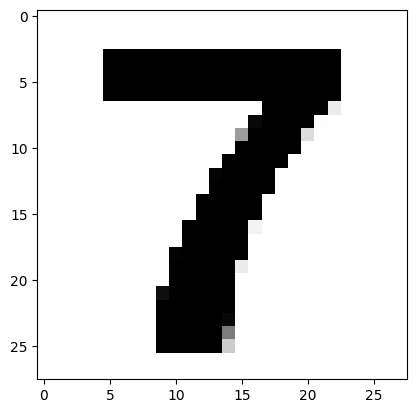

In [38]:
print('R.Sanjana')
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')